In [1]:
from glob import glob
import pandas as pd

In [2]:
# Opción que deshabilita el limite de columnas y filas mostradas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Path de los archivos no-procesados (formato parquet)
path_data = '../data/raw'

In [4]:
# Crear lista de archivos en /data/raw/y-review/
review_parquets = glob(f'{path_data}/y-review/*')
review_parquets

['../data/raw/y-review/y-review_03.parquet',
 '../data/raw/y-review/y-review_02.parquet',
 '../data/raw/y-review/y-review_01.parquet']

In [5]:
# Crear dataframe donde se unen los datos extraidos de parquet
df_review = pd.DataFrame()
# Iterar por cada parquet dentro de /data/raw/y-review/
for p in review_parquets:
    # Leer parquet
    df = pd.read_parquet(p)
    # Unir a df_review
    df_review = pd.concat([df_review, df], ignore_index=True)

In [6]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [8]:
# Verificar la cantidad de valores nulos por columna
valores_nulos = df_review.isnull().sum()

# Mostrar las columnas con valores nulos y su cantidad
print("Valores nulos por columna:")

Valores nulos por columna:


In [9]:
# Verificar la cantidad de filas duplicadas en el DataFrame
duplicados = df_review.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f"Cantidad de filas duplicadas: {duplicados}")


Cantidad de filas duplicadas: 0


In [10]:

# Especificar la ruta completa al archivo Parquet
ruta_archivo_parquet = '/home/henry/PF/Henry_PF/data/raw/y-business.parquet'

# Cargar el archivo Parquet en un DataFrame (suponiendo que contiene información de negocios)
df_business = pd.read_parquet(ruta_archivo_parquet)

# Mostrar información básica del DataFrame df_business
print(df_business.info())


<class 'pandas.core.frame.DataFrame'>
Index: 150351 entries, 0 to 1543
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150351 non-null  object 
 1   name          150351 non-null  object 
 2   address       150351 non-null  object 
 3   city          150351 non-null  object 
 4   state         150348 non-null  object 
 5   postal_code   150351 non-null  object 
 6   latitude      150351 non-null  float64
 7   longitude     150351 non-null  float64
 8   stars         150351 non-null  float64
 9   review_count  150351 non-null  int64  
 10  is_open       150351 non-null  int64  
 11  attributes    136607 non-null  object 
 12  categories    150248 non-null  object 
 13  hours         127128 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB
None


In [29]:
# Extraer solo la columna 'categories' del DataFrame original df_business
categories_column = df_business['categories']

# Mostrar las primeras filas de la columna 'categories'
print(categories_column.head())


0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
Name: categories, dtype: object


In [30]:

# Contar la cantidad de filas en la columna 'categories'
num_rows = len(categories_column)

# Mostrar la cantidad de filas
print(f"La cantidad de filas en la columna 'categories' es: {num_rows}")

La cantidad de filas en la columna 'categories' es: 150351


In [32]:
# Extraer solo la columna 'categories' del DataFrame original df_business
categories_column = df_business['categories']

# Crear una lista para almacenar las filas que contienen 'Restaurants' en 'categories'
restaurant_rows = []

# Iterar sobre cada valor de la Serie categories_column
for categories in categories_column:
    # Verificar si la categoría contiene la palabra 'Restaurants'
    if pd.notna(categories) and 'Restaurants' in categories:
        # Obtener el índice de la fila actual
        index = categories_column[categories_column == categories].index[0]
        # Extraer la fila completa correspondiente al índice y agregarla a la lista
        restaurant_rows.append(df_business.loc[index])

# Convertir la lista de filas seleccionadas a un nuevo DataFrame
restaurant_df = pd.DataFrame(restaurant_rows)

# Mostrar la información básica del nuevo DataFrame
print(restaurant_df.info())

# Mostrar las primeras filas del nuevo DataFrame
print(restaurant_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 52268 entries, 3 to 3291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51817 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         45953 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.0+ MB
None
               business_id                   name              address  \
3   MTSW4McQd7CbVtyjqoe9mw     St Honore Pastries          935 Race 

In [34]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52268 entries, 3 to 3291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51817 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         45953 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.0+ MB


In [35]:

# Unir df_review con restaurant_df por 'business_id'
merged_reviews = pd.merge(df_review, restaurant_df, on='business_id', how='inner')

In [36]:
merged_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906574 entries, 0 to 4906573
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   review_id     object 
 1   user_id       object 
 2   business_id   object 
 3   stars_x       float64
 4   useful        int64  
 5   funny         int64  
 6   cool          int64  
 7   text          object 
 8   date          object 
 9   name          object 
 10  address       object 
 11  city          object 
 12  state         object 
 13  postal_code   object 
 14  latitude      float64
 15  longitude     float64
 16  stars_y       float64
 17  review_count  int64  
 18  is_open       int64  
 19  attributes    object 
 20  categories    object 
 21  hours         object 
dtypes: float64(4), int64(5), object(13)
memory usage: 823.6+ MB


In [38]:
merged_reviews.head(2)

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,NRI6ZkovQxhAbtw8gV9Csg,xGTlAfrM208q533eDriJkg,9r_prQEvUixrjuIB4v5qCQ,5.0,0,1,0,Went for brunch this last Sunday with She Who ...,2017-08-21 23:26:25,The Ox,7701 N Nebraska Ave,Tampa,TN,33604,28.017779,-82.450985,4.0,94,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Breakfast & Brunch, Beer Bar, Bars, Asian Fusi...","{'Friday': '17:0-22:0', 'Monday': None, 'Satur..."
1,YY1Lk8bUkcheHjWM-pWgoQ,2T48z1egd0IRwrje2PgRuw,dqdEPiPQugiz8sIgMqXmiw,4.0,5,0,3,This is a nice home-town cafe. Very casual at...,2010-10-21 15:55:32,Squirrels Nest Cafe,826 W Bridge St,Morrisville,AZ,19067,40.201302,-74.788267,3.0,29,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Breakfast & Brunch, Cafes, Diners","{'Friday': '6:0-15:0', 'Monday': '7:0-15:0', '..."


In [39]:
unique_states = restaurant_df['state'].unique()
unique_states

array(['CA', 'AZ', 'TN', 'MO', 'FL', 'IN', 'LA', 'PA', 'AB', 'ID', 'IL',
       'NJ', 'NV', 'DE', 'CO', 'HI', 'MI', 'TX'], dtype=object)

In [41]:
# Definir los estados a filtrar
states_to_filter = ['NJ', 'DE', 'PA']

# Crear una máscara booleana para seleccionar las filas con los estados especificados
mask = restaurant_df['state'].isin(states_to_filter)

# Aplicar la máscara booleana para filtrar las filas
filtered_restaurants = restaurant_df[mask]

# Mostrar la información básica del DataFrame filtrado
filtered_restaurants.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15988 entries, 22 to 3291
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   15988 non-null  object 
 1   name          15988 non-null  object 
 2   address       15988 non-null  object 
 3   city          15988 non-null  object 
 4   state         15988 non-null  object 
 5   postal_code   15988 non-null  object 
 6   latitude      15988 non-null  float64
 7   longitude     15988 non-null  float64
 8   stars         15988 non-null  float64
 9   review_count  15988 non-null  int64  
 10  is_open       15988 non-null  int64  
 11  attributes    15885 non-null  object 
 12  categories    15988 non-null  object 
 13  hours         14111 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.8+ MB


In [42]:
filtered_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,PA,46250,39.904320,-86.053080,4.0,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Steakhouses, Asian Fusion, Restaurants","{'Friday': '11:0-21:0', 'Monday': '11:0-21:0',..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Friday': '12:0-2:0', 'Monday': '16:0-0:0', '..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pizza, Restaurants, Salad, Soup","{'Friday': '17:0-0:30', 'Monday': None, 'Satur..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '..."
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Burgers",None


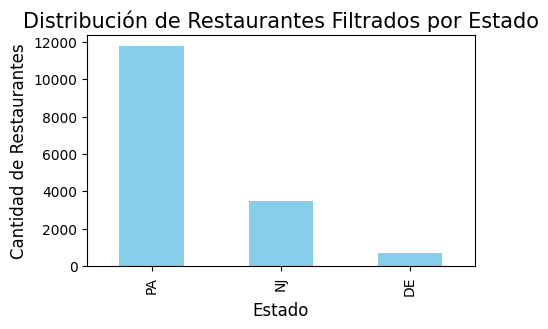

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes filtered_restaurants definido y cargado con los datos

# Obtener una Serie que cuente el número de restaurantes por estado
restaurant_counts_by_state = filtered_restaurants['state'].value_counts()

# Configurar el tamaño de la figura
plt.figure(figsize=(5, 3))

# Crear el histograma de barras para mostrar la distribución de restaurantes por estado
restaurant_counts_by_state.plot(kind='bar', color='skyblue')

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución de Restaurantes Filtrados por Estado', fontsize=15)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Cantidad de Restaurantes', fontsize=12)

# Mostrar el histograma
plt.show()


In [51]:

# Obtener solo las columnas 'name' y 'categories' de filtered_restaurants
restaurant_info = filtered_restaurants[['name', 'categories']]

# Eliminar las filas con valores nulos en 'name' o 'categories'
restaurant_info = restaurant_info.dropna(subset=['name', 'categories'])

# Obtener los valores únicos de la columna 'name' y ordenar alfabéticamente
unique_names = sorted(restaurant_info['name'].unique())

# Mostrar la lista de nombres únicos de restaurantes con sus categorías
print("Lista de nombres únicos de restaurantes en la columna 'name' con sus categorías:")
for name in unique_names:
    categories = restaurant_info[restaurant_info['name'] == name]['categories'].iloc[0]
    print(f"{name} - {categories}")


Lista de nombres únicos de restaurantes en la columna 'name' con sus categorías:
"Genuino" Italian Cafe' - Pizza, Breakfast & Brunch, Restaurants, Food, Cafeteria, Gelato
$5 Fresh Burger Stop - Restaurants, Food Stands, Burmese
&pizza - UPenn - Vegetarian, Vegan, Restaurants, Pizza
026 Pub N Biergarten - Pubs, Food, American (Traditional), Beer, Wine & Spirits, Nightlife, Bars, Restaurants, Sports Bars
1 Stop Pizza - Food, Grocery, Burgers, Pizza, Restaurants, Italian, Delis
10 & 10 Enoteca - Salad, Wine Bars, Bars, Nightlife, Food, Restaurants, Desserts, Tapas/Small Plates, Specialty Food
100 Montaditos - Sandwiches, Restaurants, Tapas/Small Plates, Spanish
1000 Degrees Pizza - Chicken Wings, Pizza, Salad, Restaurants
10th Street Diner - Vegan, Vegetarian, Restaurants
12 ACRES Restaurant - Food, Beer, Wine & Spirits, Canadian (New), Local Flavor, Soul Food, Italian, Breakfast & Brunch, Restaurants
120 West Bar & Grill - Food, Hotels & Travel, Restaurants, Hotels, American (New), Event

In [52]:
restaurant_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15988 entries, 22 to 3291
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        15988 non-null  object
 1   categories  15988 non-null  object
dtypes: object(2)
memory usage: 374.7+ KB


In [55]:
# Lista de nombres de restaurantes de interés
restaurant_names_of_interest = [
    'Yard House',
    'LongHorn Steakhouse',
    'Olive Garden Italian Restaurant',
    "Ruth's Chris Steak House",
    "Cheddar's Scratch Kitchen",
    'Seasons 52',
    'Bahama Breeze',
    'The Capital Grille',
    "Eddie V's"
]

# Filtrar 'filtered_restaurants' para incluir solo los nombres de restaurantes de interés
filtered_restaurants_of_interest = filtered_restaurants[filtered_restaurants['name'].isin(restaurant_names_of_interest)]

# Contar la frecuencia de cada restaurante en el DataFrame filtrado
restaurant_counts = filtered_restaurants_of_interest['name'].value_counts()

# Mostrar el conteo de frecuencia de cada restaurante
print("Conteo de frecuencia de cada restaurante de interés:")
print(restaurant_counts)


Conteo de frecuencia de cada restaurante de interés:
name
Olive Garden Italian Restaurant    11
Ruth's Chris Steak House            4
Cheddar's Scratch Kitchen           3
LongHorn Steakhouse                 3
Bahama Breeze                       2
Seasons 52                          2
Yard House                          1
Name: count, dtype: int64


In [56]:
# Obtener el número de establecimientos del grupo Garden
garden_restaurants_count = restaurant_counts.sum()  # Sumar el conteo de establecimientos del grupo Garden

# Obtener el número total de establecimientos
total_restaurants_count = len(filtered_restaurants)  # Contar el total de establecimientos en el DataFrame

# Calcular el porcentaje de participación de mercado del grupo Garden
market_share_percentage = (garden_restaurants_count / total_restaurants_count) * 100

# Mostrar el resultado del porcentaje de participación de mercado del grupo Garden
print(f"Porcentaje de participación del mercado del grupo Garden: {market_share_percentage:.2f}%")


Porcentaje de participación del mercado del grupo Garden: 0.16%


In [ ]:
restaurant.info()